# Part 2 - Search Algorithms with Networkx Graphs

In this part of the assignment, you will implement the following search algorithms on graphs using a Graph class that we've wrapped around the `networkx` undirected graph class: Greedy Best First Search, Uniform Cost Search, and Bi-Directional Uniform Cost Search. 

For this portion of the assignment, we have provided you with a [Graph](graph.py) class that will help you implement the search algorithms. The `Graph` class is a wrapper around the `networkx` graph class, and it provides you with the following methods:
- `init` - initializes the Graph class from a pickle file, which will generate a Networkx Undirected Graph and a dictionary of coordinates for each node in the graph
- `get_nodes` - returns a list of all nodes in the graph
- `get_edges` - returns a list of all edges in the graph
- `get_successors_and_costs` - returns a dictionary of successors and costs for a given node
- `get_successors` - returns a list of successors for a given node

We encourage you to read the [Graph](graph.py) class to understand how it works and how you can use it to implement the search algorithms.

We have also provided you with a set of helper functions in [helpers.py](helpers.py) that you can use to generate graphs and visualize the graphs (and your search algorithm implementation!) for testing and debugging purposes. We will provide you with sample graphs to test your search algorithms, and you can use the helper functions to visualize the graphs and the search algorithms. Your code will be tested on these sample graphs, and additional graphs that we will generate using the same helper functions. 

# Imports

In [149]:
# export - DO NOT MODIFY THIS CELL
# provided imports
from graph import Graph
from helpers import generate_graph, visualize_graph, save_graph_to_file, visualize_search

In [150]:
# export - DO NOT MODIFY OR MOVE THIS LINE 
# Add any additional imports (from the Python Standard Library only) here
import math
import heapq

# Demonstrating the Helper Functions & Graph Class

Below, we will demonstrate how to use the helper functions and the Graph class to generate graphs and visualize them. We will also show you how to use the Graph class functions, which you'll find useful when implementing the search algorithms!

First, we'll generate a graph with 10 nodes, with an edge probability of 0.1 (10% chance of an edge between any two nodes), and edge weights randomly selected between 1 and 20. 

Next, once the graph is generated, we will visualize it using the `visualize_graph` function from the `helpers` module. Then, we'll save the graph to a pickle file using the `save_graph_to_file` function.

Finally, we'll load it back from the pickle file by initializing a Graph object using the `init` function. We'll demonstrate how to use the Graph class functions to get the nodes, edges, successors, and successors with costs for a given node.


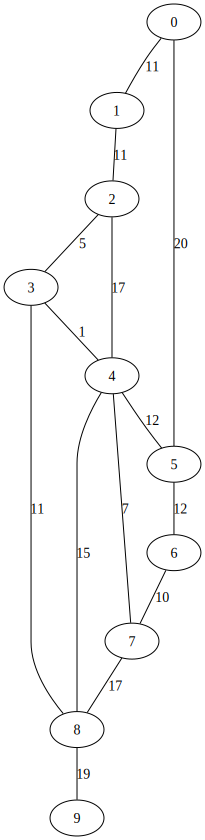

Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Edges: [(0, 1, 11), (0, 5, 20), (1, 2, 11), (2, 3, 5), (2, 4, 17), (3, 4, 1), (3, 8, 11), (4, 5, 12), (4, 7, 7), (4, 8, 15), (5, 6, 12), (6, 7, 10), (7, 8, 17), (8, 9, 19)]
Successors and their costs for node 0: {1: 11, 5: 20}
Node coordinates: {0: (4.64, 9.27), 1: (4.94, 3.61), 2: (1.62, 5.33), 3: (9.52, 6.35), 4: (6.17, 0.97), 5: (7.42, 2.42), 6: (7.66, 5.08), 7: (3.42, 0.49), 8: (6.55, 6.62), 9: (4.48, 0.55)}


In [151]:
graph, node_coords = generate_graph(num_nodes=10, edge_prob=0.1, weight_range=(1, 20))
visualize_graph(G=graph, layout="dot")
save_graph_to_file(G=graph, node_coords=node_coords, filename="sample_graphs/sample_generated_graph.pkl")

graph = Graph(filename="sample_graphs/sample_generated_graph.pkl")
print("Nodes:", graph.get_nodes())
print("Edges:", graph.get_edges())
print("Successors and their costs for node 0:", graph.get_successors_and_costs(node=0))
print("Node coordinates:", graph.node_coords)

Now that we've generated a graph and saved it as a `pickle` file, let's load it again to be safe, and this time, let's visualize a search using the provided helper function! Visualizing the results of your search algorithm implementations may be incredibly helpful for debugging purposes. 

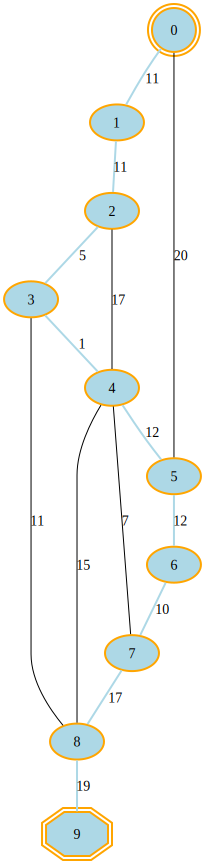

In [152]:
graph = Graph(filename="sample_graphs/sample_generated_graph.pkl")
hypothetical_path = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
hypothetical_vs = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

visualize_search(G=graph.graph, path=hypothetical_path, visited=hypothetical_vs, layout="dot")

You can also visualize the graph and search results with heuristic values displayed on the nodes. Let's load the graph from the pickle file, and visualize the graph with the heuristic values displayed on the nodes.

Visualizing the graph and/or the search with the heuristic values can be useful for manually verifying your implementation!

For our demonstration, we'll use some dummy heuristic values for the nodes. If you want to use this approach to test your search algorithms, you should use the actual heuristic values for the nodes in the graph, like so: 

```python
graph = Graph(filename="sample_graphs/sample_generated_graph.pkl")
goal_node = 9 # the goal node in this sample graph
heuristic_values = {node: euclidean_distance(node1=node, node2=goal_node, node_coords=graph.node_coords) for node in graph.get_nodes()}
```

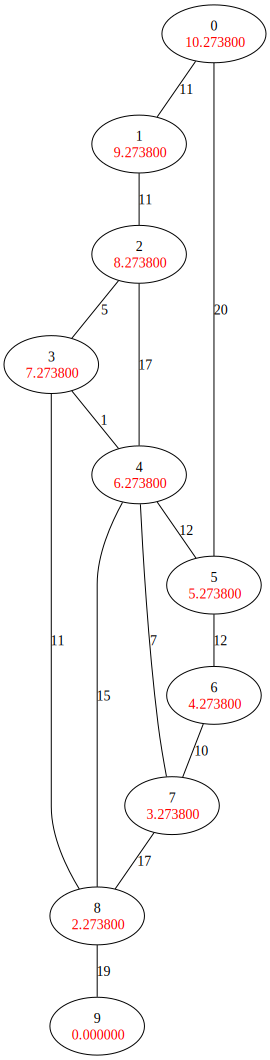

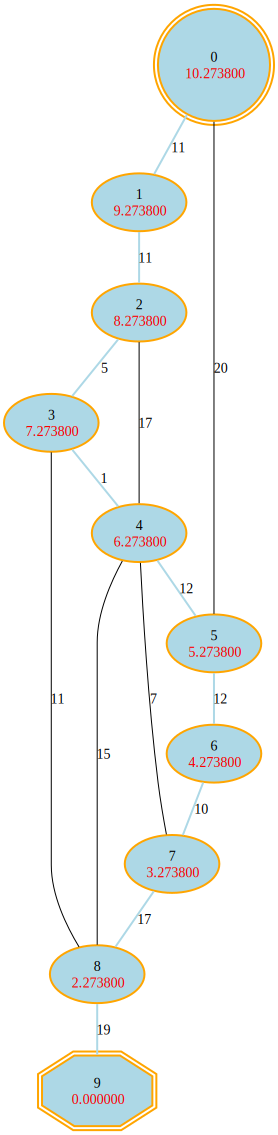

In [153]:
graph = Graph(filename="sample_graphs/sample_generated_graph.pkl")
hypothetical_path = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
hypothetical_vs = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# dummy heuristic values - you should replace these with actual values when testing your code by using the heuristic function
heuristic_values = {0: 10.2738, 1: 9.2738, 2: 8.2738, 3: 7.2738, 4: 6.2738, 5: 5.2738, 6: 4.2738, 7: 3.2738, 8: 2.2738, 9: 0.0000}
visualize_graph(G=graph.graph, layout="dot", heuristic_values=heuristic_values)
visualize_search(G=graph.graph, path=hypothetical_path, visited=hypothetical_vs, layout="dot", heuristic_values=heuristic_values)

# Euclidean Distance Heuristic

## Implementing the Euclidean Distance Function

**TODO**: Implement the `euclidean_distance` function that calculates the Euclidean distance between two nodes. You are given the IDs of the two nodes, `node1` and `node2`, and the dictionary of coordinates for each node in the graph. The coordinates of a node are stored as a tuple of`(x, y)` in the dictionary. The function should return the Euclidean distance between the two nodes as a `float`. 

In [154]:
# export - DO NOT MODIFY OR MOVE THIS LINE

def euclidean_distance(node1: int, node2: int, node_coords: dict[int, tuple[float, float]]) -> float:
    """
    Compute the Euclidean distance between two nodes based on their coordinates.

    Args:
        node1 (int): The first node ID.
        node2 (int): The second node ID.
        node_coords (Dict[int, Tuple[float, float]]): A dictionary with node IDs as keys and (x, y) coordinates as values.

    Returns:
        float: The Euclidean distance between the two nodes.
    """
    ### YOUR CODE BELOW HERE ###
    firstX = node_coords[node1][0]
    firstY = node_coords[node1][1]
    secondX = node_coords[node2][0]
    secondY = node_coords[node2][1]
    return math.sqrt((secondX - firstX)**2 + (secondY - firstY)**2)
    ### YOUR CODE ABOVE HERE ###

## Testing the Euclidean Distance Function

Here, we'll verify the correctness of your implementation of the `euclidean_distance` function by testing it with some sample data. You're more than welcome to add more test cases to further validate your implementation.

**Note:** if you change the unit tests, you will need to restart the kernel and re-run the cells for the changes to take effect.

In [155]:
# test the euclidean distance function
from tests import test_euclidean_distance
test_euclidean_distance(euclidean_distance_function=euclidean_distance)

All tests passed!


# Greedy Best-First Search

## Implementing Greedy Best-First Search

**TODO**: Implement the `greedy_best_first_search` function that performs the Greedy Best-First Search algorithm on a graph. You should only consider the Euclidean distance heuristic for this algorithm. 

You are provided with the graph, the start and goal nodes, and the heuristic function (your implementation of the `euclidean_distance` function). The function should return the path from the start to the goal node as a list of node IDs. If the algorithm does not find a path from the start to the goal node, the function should return an empty list. If the start and goal nodes are the same, the function should return an empty list. 

You should also return a set of all the nodes visited during the search, as a set of node IDs. If the start and goal nodes are the same, the function should return an empty set. If the algorithm does not find a path from the start to the goal node, the function should return a set of all the nodes visited during the search.

**Note:** When testing your code, we will always provide a connected graph, and the start and goal nodes will always be in the graph. 

**Tips**:
- Remember that the Greedy Best-First Search algorithm is an informed search algorithm that uses the heuristic function to decide which node to explore next. It always chooses the node that is closest to the goal node based on the heuristic function (think about what data structure will help you achieve this).
- Make sure to read through the `Graph` class functions to understand how to use it to help you implement the search algorithm. 
- Greedy Best-First Search is incomplete and may not find a path from the start to the goal node. Make sure to handle this case in your implementation. It is also not guaranteed to find the optimal path. This is a good exercise to think about why this is the case. 
- Break ties by choosing the node with the smallest ID. Think about how you can achieve this in your implementation. 

In [156]:
# export - DO NOT MODIFY OR MOVE THIS LINE

def greedy_best_first_search(graph: Graph, start: int, goal: int, h_func: callable = euclidean_distance) -> tuple[list[int], set[int]]:
    """
    Perform greedy search on the graph to find the path from start to goal.

    Args:
        graph (Graph): The graph to search.
        start (int): The starting node ID.
        goal (int): The goal node ID.
        h_func (callable): A heuristic function that takes three arguments: node1, node2, and node_coords.

    Returns:
        list[int]: The path from start to goal.
        set[int]: The visited nodes.
    """
    ### YOUR CODE BELOW HERE ###
    visited = set()
    path = []
    min_heap = []
    dist = h_func(start, goal, graph.node_coords)
    heapq.heappush(min_heap, (dist, start, [start]))
    while(min_heap):
        __, node, node_path = heapq.heappop(min_heap)
        if node in visited:
            continue
        visited.add(node)
        if node == goal:
            path = node_path
            break
        successors = graph.get_successors(node)
        for succ in successors:
            if succ not in visited:
                dist_succ_goal = h_func(succ, goal, graph.node_coords)
                heapq.heappush(min_heap, (dist_succ_goal, succ, node_path + [succ]))
    return (path, visited)

    ### YOUR CODE ABOVE HERE ###

## Testing Your Greedy Best-First Search Implementation

Now, let's test your Greedy Best-First Search implementation on our graphs. We have generated some sample graphs for you to test your search algorithms. We also encourage you to generate your own graphs using the helper functions provided in the `helpers` module to further test your code. We'll be doing the same on our end!

To debug your implementation, we recommend visualizing the graph using the helper functions, printing out the node coordinates, and manually checking the path returned by your implementation. This is a good way to understand what your algorithm is doing and to catch any bugs. 

**Note:** if you change the unit tests, you will need to restart the kernel and re-run the cells for the changes to take effect.

In [157]:
from tests import test_greedy_best_first_search
test_greedy_best_first_search(greedy_search_function=greedy_best_first_search, h_func=euclidean_distance)

All tests passed!


# Uniform Cost Search

## Implementing Uniform Cost Search

**TODO**: Implement the `ucs` function that performs the Uniform Cost Search algorithm on a graph.

You are provided with the graph and the start and goal nodes. The function should return the path from the start to the goal node as a list of node IDs. If the algorithm does not find a path from the start to the goal node, the function should return an empty list. If the start and goal nodes are the same, the function should return an empty list. 

You should also return a set of all the nodes visited during the search, as a set of node IDs. If the start and goal nodes are the same, the function should return an empty set. If the algorithm does not find a path from the start to the goal node, the function should return a set of all the nodes visited during the search.

**Note:** When testing your code, we will always provide a connected graph, and the start and goal nodes will always be in the graph. 


**Tips**:
- Remember that Uniform Cost Search is a variant of Dijkstra's algorithm that finds the shortest path from the start node to the goal node. It explores the nodes in increasing order of path cost from the start node. Think about what data structure will help you achieve this.
- Make sure to read through the `Graph` class functions to understand how to use it to help you implement the search algorithm. 
- Break ties by choosing the node with the smallest ID. Think about how you can achieve this in your implementation. 

In [158]:
# export - DO NOT MODIFY OR MOVE THIS LINE

def ucs(graph: Graph, start: int, goal: int) -> tuple[list[int], set[int]]:
    """
    Perform uniform-cost search on the graph to find the path from start to goal.
    
    Args:
        graph (Graph): The graph to search.
        start (int): The starting node ID.
        goal (int): The goal node ID.

    Returns:
        list[int]: The path from start to goal.
        set[int]: The visited nodes.
    """
    ### YOUR CODE BELOW HERE ###
    visited = set()
    min_heap = []
    heapq.heappush(min_heap, (0, start, [start]))
    while min_heap:
        c, node, node_path = heapq.heappop(min_heap)
        if node in visited:
            continue
        visited.add(node)
        if node == goal:
            path = node_path
            break
        for succ, edge_cost in graph.get_successors_and_costs(node).items():
            if succ not in visited:
                heapq.heappush(min_heap, (c + edge_cost, succ, node_path + [succ]))
    return (path, visited)

    ### YOUR CODE ABOVE HERE ###

## Testing Your Uniform Cost Search Implementation

Now, let's test your Uniform Cost Search implementation on our graphs. We have generated some sample graphs for you to test your search algorithms. We also encourage you to generate your own graphs using the helper functions provided in the `helpers` module to further test your code. We'll be doing the same on our end!

To debug your implementation, we recommend visualizing the graph using the helper functions, printing out the node coordinates, and manually checking the path returned by your implementation. This is a good way to understand what your algorithm is doing and to catch any bugs. 

**Note:** if you change the unit tests, you will need to restart the kernel and re-run the cells for the changes to take effect.

In [159]:
# test the function
from tests import test_ucs
test_ucs(ucs_function=ucs)

All tests passed!


# Bi-Directional Uniform Cost Search

## Implementing Bi-Directional Uniform Cost Search

**TODO**: Implement the `bidirectional_ucs` function that performs the Bi-Directional Uniform Cost Search algorithm on a graph. Bi-Directional Uniform Cost Search is a variant of Uniform Cost Search that starts the search from both the start and goal nodes and meets in the middle. 

You are provided with the graph and the start and goal nodes. The function should return the path from the start to the goal node as a list of node IDs. If the algorithm does not find a path from the start to the goal node, the function should return an empty list. If the start and goal nodes are the same, the function should return an empty list. 

You should also return 2 sets of all the nodes visited during the search from the start node and the goal node, respectively, as sets of node IDs. If the start and goal nodes are the same, you should return an empty set for both sets. If the algorithm does not find a path from the start to the goal node, you should return sets of all the nodes visited during the search from the start node and the goal node, respectively.

**Note:** When testing your code, we will always provide a connected graph, and the start and goal nodes will always be in the graph. 

**General Tips**:
- Remember that Uniform Cost Search is a variant of Dijkstra's algorithm that finds the shortest path from the start node to the goal node. It explores the nodes in increasing order of path cost from the start node. Think about what data structure will help you achieve this.
- Make sure to read through the `Graph` class functions to understand how to use it to help you implement the search algorithm. 
- Break ties by choosing the node with the smallest ID. Think about how you can achieve this in your implementation. 

**Tips and Guiding Questions for Bi-Directional UCS**:
- Expanding both the start and goal nodes will be similar to Uniform Cost Search, but you will have to also consider the intersection between the two sets of nodes. When the two sets of nodes intersect, what does that indicate? What should you do when you find an intersection between the two sets of nodes that you've visited?
- Think about what your stopping condition should be for the Bi-Directional UCS algorithm. When do you know that you have found the optimal path?
- Think about how you can reconstruct the path from the start to the goal node once you have found the intersection between the two sets of nodes. How can you store the information needed to construct the path from the start to the goal node?

In [160]:
# export - DO NOT MODIFY OR MOVE THIS LINE

def bidirectional_ucs(graph: Graph, start: int, goal: int) -> tuple[list[int], set[int], set[int]]:
    """
    Perform a bidirectional uniform-cost search to find the shortest path 
    between the start and goal nodes in a given graph.

    This algorithm simultaneously explores paths from both the start and 
    goal nodes, meeting in the middle to potentially reduce the search 
    space compared to traditional uniform-cost search. It maintains two 
    frontiers and two sets of visited nodes, expanding the search in both 
    directions until a path is found or all possibilities are exhausted.

    Parameters:
    graph (Graph): The graph to search, represented as an instance of the Graph class.
    start (int): The starting node for the search.
    goal (int): The target node for the search.

    Returns:
    list[int]: A list of nodes representing the path from the start node to the goal node.
    set[int]: A set of nodes visited during the search process from the start node.
    set[int]: A set of nodes visited during the search process from the goal node.
    """
    ### YOUR CODE BELOW HERE ###
    if start == goal:
        return [], set(), set()
    sf = [(0, start)]
    sg = [(0, goal)]
    vs = {start: (0, None)}
    vg = {goal: (0, None)}
    es = set()
    eg = set()
    cost = float('inf')
    m = None
    while sf and sg:
        # verify for lowest cost
        cs, __ = sf[0]
        cg, __ = sg[0]
        # break loop if addition of these costs is > than whatever cost we have already.
        if cg + cs >= cost:
            break
        # time to go off sf
        if cs <= cg:
            cc, cn = heapq.heappop(sf)
            es.add(cn)
            # go back into loop if curr cost > whatever already there
            if cc > vs[cn][0]:
                continue
            # check if node been visited from goal
            if cn in vg:
                if cc + vg[cn][0] < cost:
                    cost = cc + vg[cn][0]
                    m = cn
            for succ, cost_ in graph.get_successors_and_costs(cn).items():
                if succ not in vs or (cc + cost_) < vs[succ][0]:
                    vs[succ] = ((cc + cost_), cn)
                    heapq.heappush(sf, ((cc + cost_), succ))
        else:
            cc, cn = heapq.heappop(sg)
            eg.add(cn)
            # go back into loop if curr cost > whatever already there
            if cc > vg[cn][0]:
                continue
            # check if node been visited from start
            if cn in vs:
                if cc + vs[cn][0] < cost:
                    cost = cc + vs[cn][0]
                    m = cn
            for succ, cost_ in graph.get_successors_and_costs(cn).items():
                if succ not in vg or (cc + cost_) < vg[succ][0]:
                    vg[succ] = ((cc + cost_), cn)
                    heapq.heappush(sg, ((cc + cost_), succ))
    if m is None:
        return [], es, eg
    path = []
    if m is not None:
        fn = m
        while fn is not None:
            path.append(fn)
            fn = vs[fn][1]
        path = path[::-1]
        bn = vg[m][1]
        while bn is not None:
            path.append(bn)
            bn = vg[bn][1]
    return path, es, eg
    
    ### YOUR CODE ABOVE HERE ###

## Testing Your Bi-Directional Uniform Cost Search Implementation

Now, let's test your Uniform Cost Search implementation on our graphs. We have generated some sample graphs for you to test your search algorithms. We also encourage you to generate your own graphs using the helper functions provided in the `helpers` module to further test your code. We'll be doing the same on our end!

To debug your implementation, we recommend visualizing the graph using the helper functions, printing out the node coordinates, and manually checking the path returned by your implementation. This is a good way to understand what your algorithm is doing and to catch any bugs. 

**Note:** if you change the unit tests, you will need to restart the kernel and re-run the cells for the changes to take effect.

In [161]:
# test the function
from tests import test_bidirectional_ucs
test_bidirectional_ucs(bidirectional_ucs_function=bidirectional_ucs)

All tests passed!


# Playground

Feel free to use this space to test your implementations and debug. We highly recommend creating your own graphs using the provided helper functions and testing your search algorithms on them. Visualizing them will help you manually verify the correctness of your implementations. We will be testing your code on our end similarly!

Nothing from this point onwards will be exported in the autograder nor will it be graded.

In [162]:
### YOUR CODE BELOW  HERE ###
print("Your space to mess around with the functions and test them out!")
### YOUR CODE ABOVE HERE ###

Your space to mess around with the functions and test them out!


# Grading

Grading will consist of testing your implementations of the heuristic and search algorithms. We will _also_ test your algorithms on hidden configurations. Rest assured, these configurations do **NOT** have any invalid configurations or edge cases that you must consider (i.e., there will ALWAYS be a path to the goal, there will always be a start state and goal state that are in the graph, etc.). We are simply testing your code further to ensure that no cases are hardcoded. 

## Rubric
- 5 points for correctly implementing the `euclidean_distance` function (5 points total).
- 5 points for each correct path returned by the `greedy_best_first_search` function for provided configurations (10 points total).
- 5 points for each correct path returned by the `greedy_best_first_search` function for hidden configurations (15 points total). 
- 5 points for each correct path returned by the `ucs` function for provided configurations (10 points total).
- 6.67 points for each correct path returned by the `ucs` function for hidden configurations (20 points total).
- 5 points for each correct path returned by the `bidirectional_ucs` function for provided configurations (10 points total).
- 10 points for each correct path returned by the `bidirectional_ucs` function for hidden configurations (30 points total).
- -0.1 point deduction for each 10% difference between the number of visited states and the set threshold of expected visited states.

**Maximum total points: 100**

## Important Details
Grading will be conducted by comparing your plans and number of visited states to our rubric. We will appropriately test additional configurations (graphs) in the autograder in the same manner as the unit tests provided locally.

The autograder will display "sanity check" results to help you verify that your code behaves the same in the autograder as it does locally. These tests are a subset of the full autograder, and will test the some of the same configurations that we have provided. It is your responsibility to test your code and verify its correctness, and you should use the provided resources to do so. 

We will also inspect the notebook to check if your algorithm implementations include details that are inconsistent with the assignment (e.g., hard-coding values to pass tests) and to make sure no cells were altered to provide unearned grading results. Doing so will result in a grade of 0 for the entire assignment, and may be reported to the Office of Student Integrity.

Your submissions are also subject to plagiarism checks - as a reminder, all code must be written by yourself, and no one else (classmates, excessive internet resources, LLMs, etc.). You are permitted to use course resources to help you complete the assignment. Any violations of this will receive a 0 and may be reported to the Office of Student Integrity for further investigation. 

# Submission

Upload this notebook with the name `submission.ipynb` file to Gradescope. The autograder will **only** run successfully if your file is named this way. You must ensure that you have removed all print statements from **your** code, or the autograder may fail to run. Excessive print statements will also result in muddled test case outputs, which makes it more difficult to interpret your score. 

We've added appropriate comments to the top of certain cells for the autograder to export (`# export`). You do NOT have to do anything (e.g. remove print statements) to cells we have provided - anything related to those have been handled for you. You are responsible for ensuring your own code has no syntax errors or unnecessary print statements. You ***CANNOT*** modify the export comments at the top of the cells, or the autograder will fail to run on your submission.

You should ***not*** add any cells that your code requires to the notebook when submitting. You're welcome to add any code as you need to extra cells when testing, but they will not be graded. Only the provided cells will be graded. As mentioned in the top of the notebook, **any helper functions that you add should be nested within the function that uses them.**

If you encounter any issues with the autograder, please feel free to make a post on Ed Discussion. We highly recommend making a public post to clarify any questions, as it's likely that other students have the same questions as you! If you have a question that needs to be private, please make a private post.